<a href="https://colab.research.google.com/github/GuillaumeArp/Wild_Notebooks/blob/main/ML_Clustering_K_means_Guillaume_Arp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
# Standardize the data

cols = df.columns[:-1]
X = df[cols]

scaler = StandardScaler().fit(X)

X_scaled = scaler.transform(X)

In [ ]:
# Train the model with 3 clusters

modelKM3 = KMeans(n_clusters=3)
modelKM3.fit(X_scaled)

centers3 = modelKM3.cluster_centers_
centers3

array([[-1.01457897,  0.85326268, -1.30498732, -1.25489349],
       [-0.05021989, -0.88337647,  0.34773781,  0.2815273 ],
       [ 1.13597027,  0.08842168,  0.99615451,  1.01752612]])

In [ ]:
labels3 = modelKM3.labels_
labels3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [ ]:
inertia3 = modelKM3.inertia_
inertia3

139.82049635974974

In [ ]:
df['labels'] = labels3
df

,sepal_length,sepal_width,petal_length,petal_width,species,labels
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,1
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


In [ ]:
centers_unscaled_3 = scaler.inverse_transform(centers3)
centers_unscaled_3

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.80188679, 2.67358491, 4.36981132, 1.41320755],
       [6.78085106, 3.09574468, 5.5106383 , 1.97234043]])

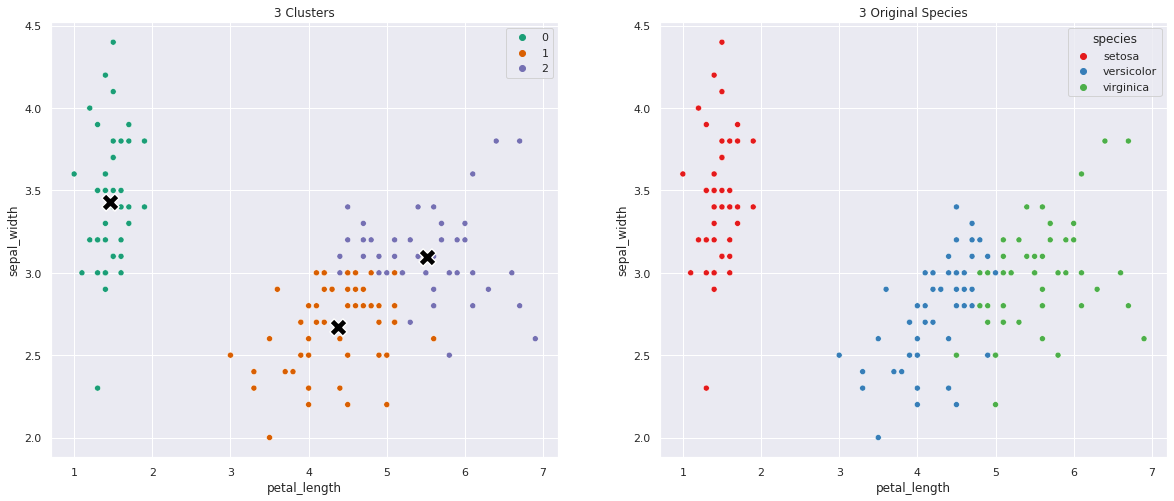

In [ ]:
# Visualize the results

sns.set_theme()

fig, ax = plt.subplots(figsize=(20, 8))

ax1 = plt.subplot(121)
ax1 = sns.scatterplot(data=df, x='petal_length', y='sepal_width', hue='labels', palette='Dark2')
ax1 = sns.scatterplot(x=centers_unscaled_3[:,2], y=centers_unscaled_3[:,1], marker='X', s=300, color='black')
ax1 = plt.title('3 Clusters')

ax2 = plt.subplot(122)
ax2 = sns.scatterplot(data=df, x='petal_length', y='sepal_width', hue='species', palette='Set1')
ax2 = plt.title('3 Original Species')

plt.show()


In [ ]:
# Train the model with 2 clusters

modelKM2 = KMeans(n_clusters=2)
modelKM2.fit(X_scaled)

centers2 = modelKM2.cluster_centers_
centers2

array([[ 0.50728948, -0.42663134,  0.65249366,  0.62744675],
       [-1.01457897,  0.85326268, -1.30498732, -1.25489349]])

In [ ]:
labels2 = modelKM2.labels_
labels2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
centers_unscaled_2 = scaler.inverse_transform(centers2)
centers_unscaled_2

array([[6.262, 2.872, 4.906, 1.676],
       [5.006, 3.428, 1.462, 0.246]])

In [ ]:
df['labels'] = labels2
df

,sepal_length,sepal_width,petal_length,petal_width,species,labels
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,0
146,6.3,2.5,5.0,1.9,virginica,0
147,6.5,3.0,5.2,2.0,virginica,0
148,6.2,3.4,5.4,2.3,virginica,0


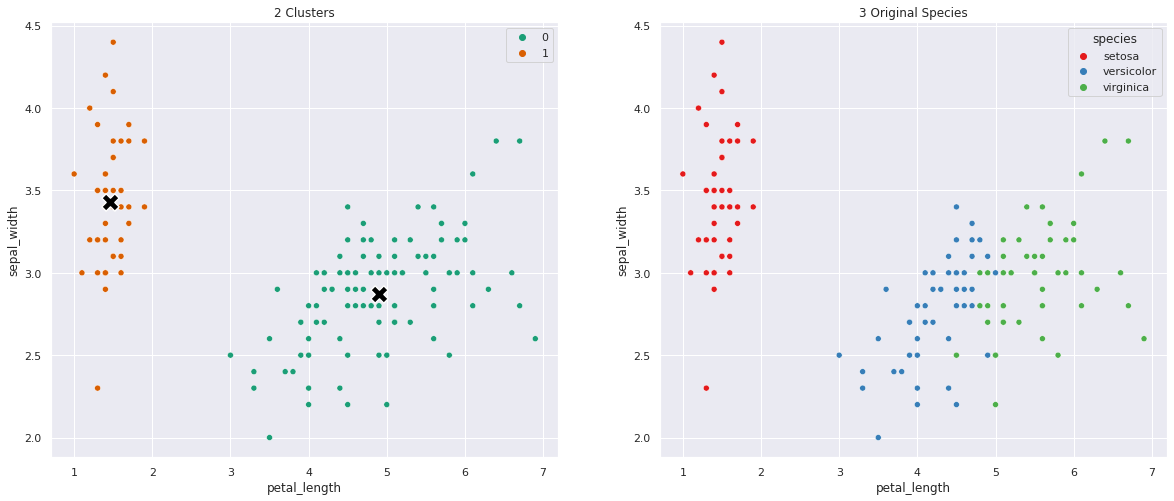

In [ ]:
# Visualize the results

fig, ax = plt.subplots(figsize=(20, 8))

ax1 = plt.subplot(121)
ax1 = sns.scatterplot(data=df, x='petal_length', y='sepal_width', hue='labels', palette='Dark2')
ax1 = sns.scatterplot(x=centers_unscaled_2[:,2], y=centers_unscaled_2[:,1], marker='X', s=300, color='black')
ax1 = plt.title('2 Clusters')

ax2 = plt.subplot(122)
ax2 = sns.scatterplot(data=df, x='petal_length', y='sepal_width', hue='species', palette='Set1')
ax2 = plt.title('3 Original Species')

plt.show()

In [ ]:
# Train the model with 4 clusters

modelKM4 = KMeans(n_clusters=4)
modelKM4.fit(X_scaled)

centers4 = modelKM4.cluster_centers_
centers4

array([[-1.35230687,  0.11914427, -1.31439133, -1.29749445],
       [ 1.13140499,  0.07903422,  0.98537152,  0.99908828],
       [-0.06881714, -0.89339955,  0.34522179,  0.28439302],
       [-0.74922133,  1.43007001, -1.29759846, -1.22142131]])

In [ ]:
labels4 = modelKM4.labels_
labels4

array([3, 0, 0, 0, 3, 3, 0, 3, 0, 0, 3, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 0, 0, 0, 3, 3, 3, 0, 0, 3, 3, 3, 0, 0, 3, 3, 0, 3, 3, 0, 0, 3,
       3, 0, 3, 0, 3, 0, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [ ]:
centers_unscaled_4 = scaler.inverse_transform(centers4)
centers_unscaled_4

array([[4.72727273, 3.10909091, 1.44545455, 0.21363636],
       [6.77708333, 3.09166667, 5.49166667, 1.95833333],
       [5.78653846, 2.66923077, 4.36538462, 1.41538462],
       [5.225     , 3.67857143, 1.475     , 0.27142857]])

In [ ]:
df['labels'] = labels4
df

,sepal_length,sepal_width,petal_length,petal_width,species,labels
0,5.1,3.5,1.4,0.2,setosa,3
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,3
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,1
148,6.2,3.4,5.4,2.3,virginica,1


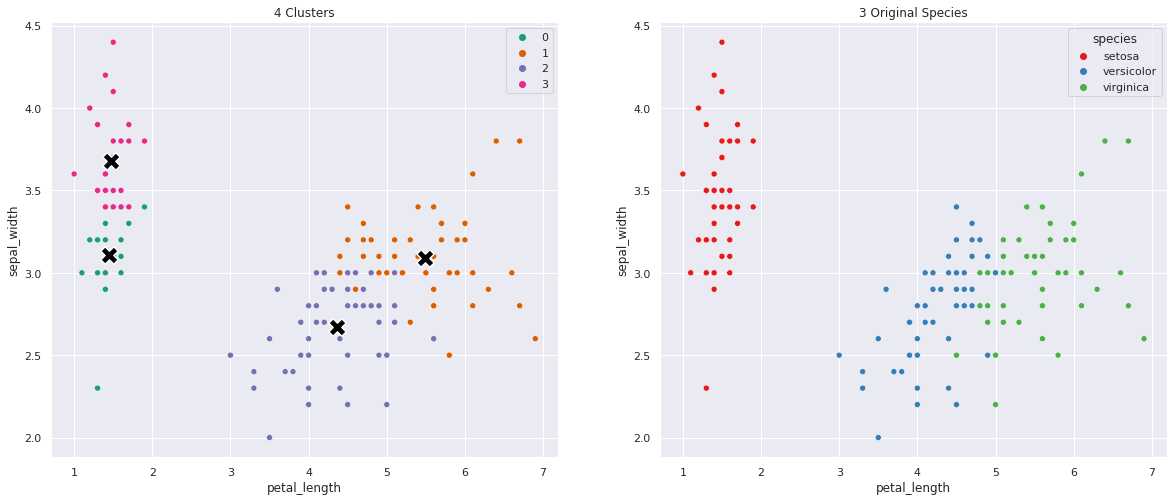

In [ ]:
# Visualize the results

fig, ax = plt.subplots(figsize=(20, 8))

ax1 = plt.subplot(121)
ax1 = sns.scatterplot(data=df, x='petal_length', y='sepal_width', hue='labels', palette='Dark2')
ax1 = sns.scatterplot(x=centers_unscaled_4[:,2], y=centers_unscaled_4[:,1], marker='X', s=300, color='black')
ax1 = plt.title('4 Clusters')

ax2 = plt.subplot(122)
ax2 = sns.scatterplot(data=df, x='petal_length', y='sepal_width', hue='species', palette='Set1')
ax2 = plt.title('3 Original Species')

plt.show()

In [ ]:
# Evaluation with Elbow method

inertia_cols = ['K', 'Inertia']
inertia_list = []

for i in range(1,11):
  modelKM = KMeans(n_clusters=i)
  modelKM.fit(X_scaled)
  inertia_list.append([i, modelKM.inertia_])

  
inertia_df = pd.DataFrame(inertia_list, columns=inertia_cols)
inertia_df



,K,Inertia
0,1,600.000000
1,2,222.361705
2,3,139.820496
3,4,114.092238
4,5,90.807592
5,6,81.750576
6,7,71.009802
7,8,63.394424
8,9,54.226473
9,10,47.185866


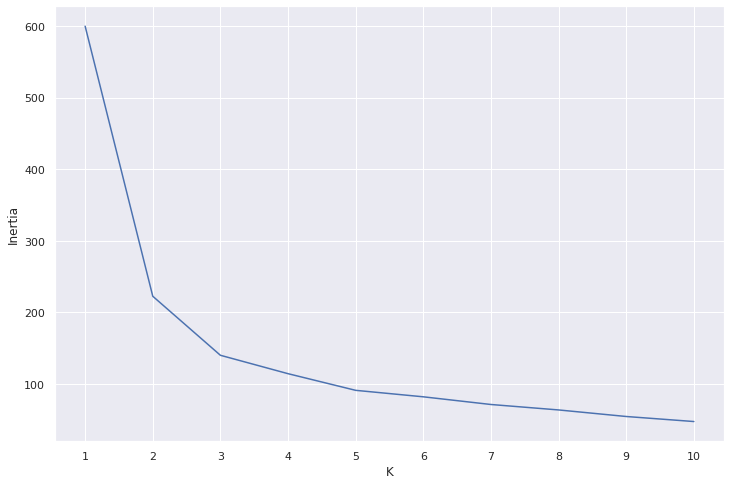

In [ ]:
fig = plt.figure(figsize=(12,8))

fig = sns.lineplot(data=inertia_df, x='K', y='Inertia')
fig.set_xticks(range(1,11))
plt.show()

The optimal number of clusters seems to be 2, but the visual interpretation is unaccurate, and it could also be 3, even though the angle seems less steep.

In [ ]:
# Evaluation with Silhouette method

silhouette_cols = ['K', 'Silhouette Score']
silhouette_list = []

for i in range(2,11):
  modelKM = KMeans(n_clusters=i)
  modelKM.fit(X_scaled)
  silhouette_list.append([i, silhouette_score(X_scaled, modelKM.labels_)])

  
silhouette_df = pd.DataFrame(silhouette_list, columns=silhouette_cols)
silhouette_df

,K,Silhouette Score
0,2,0.581750
1,3,0.459948
2,4,0.386941
3,5,0.346589
4,6,0.322842
5,7,0.330889
6,8,0.318537
7,9,0.338682
8,10,0.349694


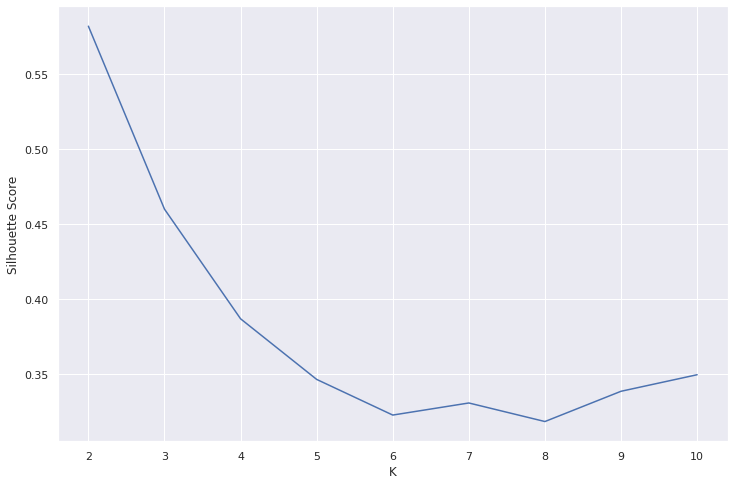

In [ ]:
fig = plt.figure(figsize=(12,8))

sns.lineplot(data=silhouette_df, x='K', y='Silhouette Score')
plt.show()

Based on the Silhouette Score, the ideal number of clusters seems to be 2.

## Findings

Without knowing the actual number of species, and based on those two metrics, I would say that the ideal number of clusters is 2. The result is pretty clear on the Silhouette metrics, and although the Elbow method is less conclusive, the number 2 seems to match the Silhouette results.